<a href="https://colab.research.google.com/github/siddley1001/Investing/blob/main/Industry_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product


# %pip install ta-lib
# %pip install zipline
#Trading Libraries
# import talib #Technical Analysis Libraries: Bollinger Bands, Aroon Oscillator, MACD (MA Convergence/Divergence), RSI (Relative Strength Index)
# import zipline #Backtesting and Live Trading

#Backtesting Helper Functions

In [22]:
def backtest_strategy(data, sma, lma):
    data['daily_returns'] = data['Adj Close'].pct_change()

    data['sma'] = data['Adj Close'].rolling(sma).mean()
    data['lma'] = data['Adj Close'].rolling(lma).mean()

    data['signals'] = np.where(data['sma'] >= data['lma'], 1, -1)

    data.dropna(inplace = True)

    data['strategic_returns'] = data['daily_returns'] * data['signals'].shift(1)
    
    cum_s_returns = (data['strategic_returns']+ 1).cumprod()

    return round(cum_s_returns.iloc[-1] -1, 3)

def cumm_returns(ticker_list, sma, lma, start_string, end_string):
    returns = dict()
    for ticker in ticker_list:
        data = yf.download(ticker, start_string, end_string)

        ticker_return = backtest_strategy(data, sma, lma)

        print(f'Cummulative Strategy Returns for {ticker}:', ticker_return)

        returns[ticker] = ticker_return
    else:
        print('Computations Completed!')

def visualize_returns(ticker_list, sma, lma, start_string, end_string):
    returns = dict()
    colors = list()

    for ticker in ticker_list:
        data = yf.download(ticker, start_string, end_string)

        ticker_return = backtest_strategy(data, sma, lma)

        print(f'Cummulative Strategy Returns for {ticker}:', ticker_return)

        returns[ticker] = ticker_return
    
    #colors for visualization
    for k, v in returns.items():
        if v > 0:
            colors.append('lightgreen')
        else:
            colors.append('lightcoral')
    
    plt.figure(figsize = (14,7))
    plt.bar(returns.keys(), returns.values(), color = colors)
    plt.title('MAC Returns on stocks')
    plt.xlabel('Stocks')
    plt.ylabel('Returns')
    plt.show()

def optimize(data, sma_range, lma_range):
    best_returns = -.99
    best_sma = 0
    best_lma = 0
    
    for x in product(sma_range, lma_range):
        sma_val = x[0]
        lma_val = x[1]
       
        print(f'SMA value: {sma_val} and LMA value: {lma_val}')
        returns = backtest_strategy(data, sma_val, lma_val)

        if returns > best_returns:
            best_returns = returns
            best_sma = sma_val
            best_lma = lma_val
        
    return best_returns, best_sma, best_lma

def test_optimize(stock_list, start_string, end_string, sma_range, lma_range):
    ret_values = {}
    sma_values = {}
    lma_values = {}

    for stock in stock_list:
        data = yf.download(stock, start = start_string, end = end_string)

        net_returns, b_sma, b_lma = optimize(data, sma_range, lma_range)

        print(f'Cummulative strategy returns for {stock}:', net_returns)

        ret_values[stock] = net_returns
        sma_values[stock] = b_sma
        lma_values[stock] = b_lma
    else:
        print('Computations completed!')
        print(f'The final values are as follows: \n{ret_values}\n {sma_values}\n {lma_values}')

In [3]:
sma = 14
lma = 60

start = '2016-01-01'
end = '2021-10-21'

#current total range is 20?
sma_range = range(2, 12, 2)
lma_range = range(60, 80, 5)

# Travel (Airlines)
- Delta (DAL)
- United Airlines (UAL)
- Spirit (SAVE)
- American Airlines (AAL)
- Alaska Airlines (ALK)

In [4]:
airlines = ['DAL', 'UAL', 'SAVE', 'AAL', 'ALK']
# airlines = ['DAL']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for DAL: -0.679
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for UAL: -0.908
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for SAVE: -0.586
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for AAL: -0.958
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for ALK: -0.53


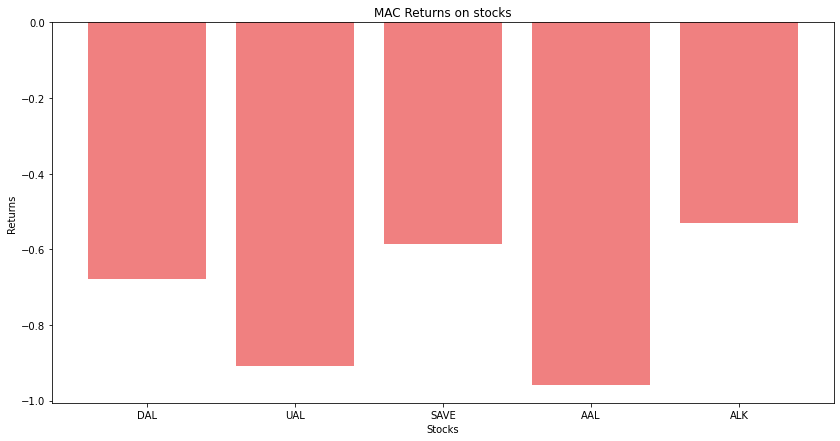

In [5]:
visualize_returns(airlines, sma, lma, start, end)

In [6]:
test_optimize(airlines, start, end, sma_range, lma_range)

[*********************100%***********************]  1 of 1 completed
Cummulative strategy returns for DAL: 0.189
[*********************100%***********************]  1 of 1 completed
Cummulative strategy returns for UAL: -0.01
[*********************100%***********************]  1 of 1 completed
Cummulative strategy returns for SAVE: 0.646
[*********************100%***********************]  1 of 1 completed
Cummulative strategy returns for AAL: 0.423
[*********************100%***********************]  1 of 1 completed
Cummulative strategy returns for ALK: 0.37
Computations completed!
The final values are as follows: 
{'DAL': 0.189, 'UAL': -0.01, 'SAVE': 0.646, 'AAL': 0.423, 'ALK': 0.37}
 {'DAL': 10, 'UAL': 10, 'SAVE': 4, 'AAL': 10, 'ALK': 6}
 {'DAL': 70, 'UAL': 75, 'SAVE': 60, 'AAL': 70, 'ALK': 70}


# Finance (Traditional - Banks)

- Wells Fargo (WF)
- JPMorgan Chase (JPM)
- Bank of America (BAC)
- Citi (C)







In [7]:
banks = ['WF', 'JPM', 'BAC', 'C']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for WF: -0.02
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for JPM: -0.011
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for BAC: 0.051
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for C: 0.127


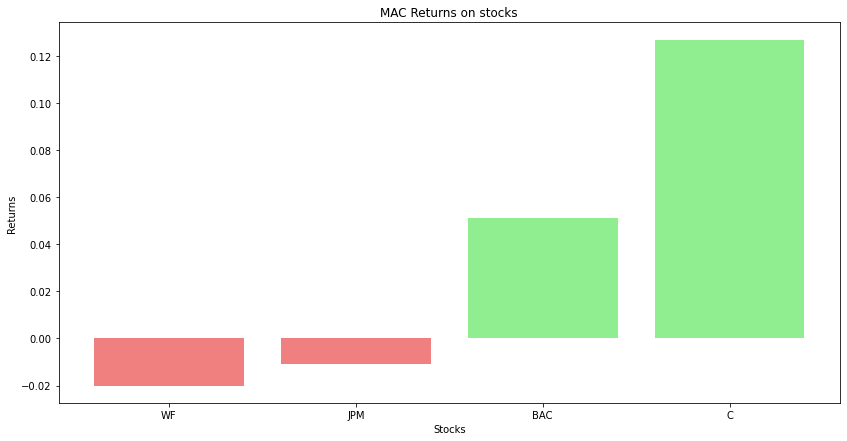

In [8]:
visualize_returns(banks, sma, lma, start, end)

In [9]:
test_optimize(banks, start, end, sma_range, lma_range)

[*********************100%***********************]  1 of 1 completed
Cummulative strategy returns for WF: 0.106
[*********************100%***********************]  1 of 1 completed
Cummulative strategy returns for JPM: 0.529
[*********************100%***********************]  1 of 1 completed
Cummulative strategy returns for BAC: 0.42
[*********************100%***********************]  1 of 1 completed
Cummulative strategy returns for C: 0.953
Computations completed!
The final values are as follows: 
{'WF': 0.106, 'JPM': 0.529, 'BAC': 0.42, 'C': 0.953}
 {'WF': 10, 'JPM': 6, 'BAC': 10, 'C': 4}
 {'WF': 75, 'JPM': 75, 'BAC': 70, 'C': 60}


# Telecommunications (Wireless Carriers)
- AT&T (T)
- Verizon (VZ)
- T-mobile (TMUS)

In [10]:
telecoms = ['T', 'VZ', 'TMUS']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for T: -0.237
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for VZ: -0.661
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for TMUS: -0.208


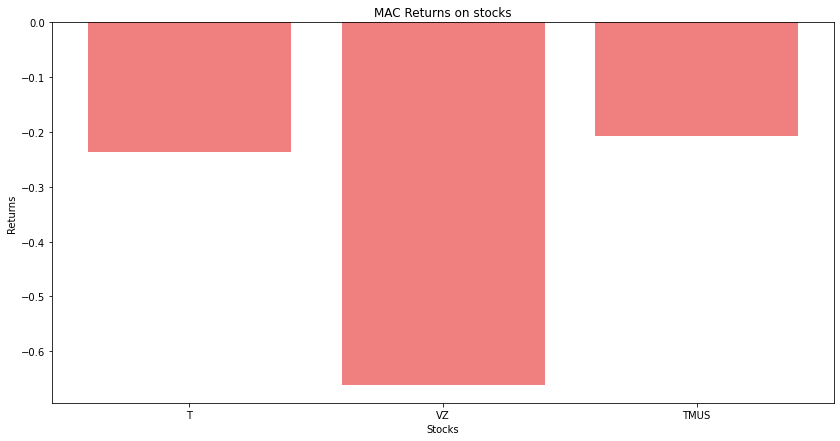

In [11]:
visualize_returns(telecoms, sma, lma, start, end)

In [12]:
test_optimize(telecoms, start, end, sma_range, lma_range)

[*********************100%***********************]  1 of 1 completed
Cummulative strategy returns for T: 0.012
[*********************100%***********************]  1 of 1 completed
Cummulative strategy returns for VZ: -0.024
[*********************100%***********************]  1 of 1 completed
Cummulative strategy returns for TMUS: 0.101
Computations completed!
The final values are as follows: 
{'T': 0.012, 'VZ': -0.024, 'TMUS': 0.101}
 {'T': 4, 'VZ': 10, 'TMUS': 8}
 {'T': 75, 'VZ': 75, 'TMUS': 75}


# Travel (Auto)
- Tesla (TSLA)
- Ford (F)
- BMW (BMWYY)
- Toyota (TM)
- Honda (HMC)
- Nio (NIO)

In [13]:
autos = ['TSLA', 'F', 'TM', 'HMC', 'NIO', 'BMWYY']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for TSLA: -0.519
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for F: 0.19
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for TM: -0.394
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for HMC: -0.162
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for NIO: 5.335
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for BMWYY: -0.344


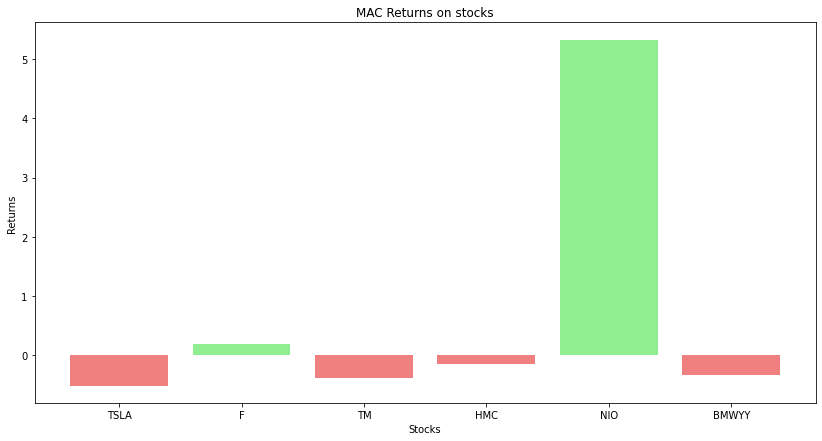

In [14]:
visualize_returns(autos, sma, lma, start, end)

In [23]:
test_optimize(autos, start, end, sma_range, lma_range)

[*********************100%***********************]  1 of 1 completed
SMA value: 2 and LMA value: 60
SMA value: 2 and LMA value: 65
SMA value: 2 and LMA value: 70
SMA value: 2 and LMA value: 75
SMA value: 4 and LMA value: 60
SMA value: 4 and LMA value: 65
SMA value: 4 and LMA value: 70
SMA value: 4 and LMA value: 75
SMA value: 6 and LMA value: 60
SMA value: 6 and LMA value: 65
SMA value: 6 and LMA value: 70
SMA value: 6 and LMA value: 75
SMA value: 8 and LMA value: 60
SMA value: 8 and LMA value: 65
SMA value: 8 and LMA value: 70
SMA value: 8 and LMA value: 75
SMA value: 10 and LMA value: 60
SMA value: 10 and LMA value: 65
SMA value: 10 and LMA value: 70
SMA value: 10 and LMA value: 75
Cummulative strategy returns for TSLA: 3.362
[*********************100%***********************]  1 of 1 completed
SMA value: 2 and LMA value: 60
SMA value: 2 and LMA value: 65
SMA value: 2 and LMA value: 70
SMA value: 2 and LMA value: 75
SMA value: 4 and LMA value: 60
SMA value: 4 and LMA value: 65
SMA val

IndexError: ignored

In [21]:
data = yf.download('TSLA', start, end)
# len(data)
backtest_strategy(data, 6, 75)
# start

[*********************100%***********************]  1 of 1 completed


678

# HealthCare

*   Hospital conglomerates

*   Insurance companies

*   Institutional services

* Drug Manufacturers

*   Medical instrument makers

*   Biomedical companies

**52.3% CAGR** with advent of AI

In [24]:
healthcare = ['SNSE', 'PDSB', 'LFMD', 'PROG', 'GTH', 'DBTX', 'IMMP', 'PRPO', 'IMAB']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for SNSE: -0.106
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for PDSB: -0.968
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for LFMD: -0.999
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for PROG: 0.175
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for GTH: 0.093
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for DBTX: -0.19
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for IMMP: -0.6
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for PRPO: -1.111
[*********************100%***********************]  1 of 1 completed
Cummulative Strat

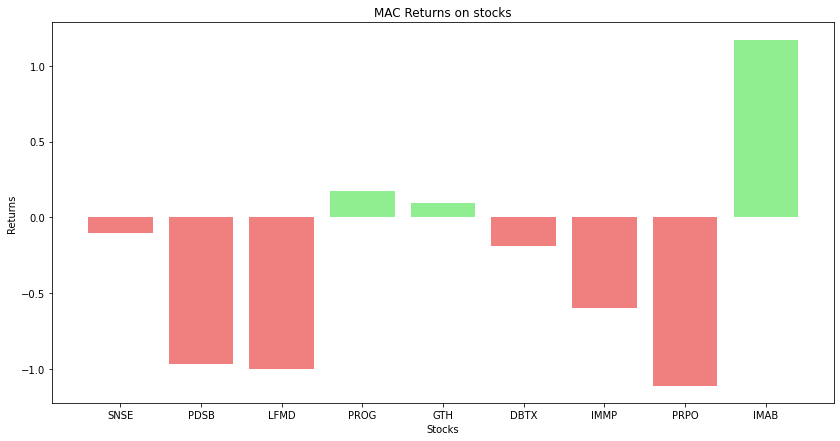

In [25]:
visualize_returns(healthcare, sma, lma, start, end)

In [26]:
test_optimize(healthcare, start, end, sma_range, lma_range)

[*********************100%***********************]  1 of 1 completed
SMA value: 2 and LMA value: 60
SMA value: 2 and LMA value: 65


IndexError: ignored

# Computer and Tech (IT)

*   Product Manufacturers
*   Service Providers

**22% CAGR potential**


In [27]:
it = ['INTZ', 'LSPD', 'TLS', 'AUUD', 'CPSH', 'TAIT', 'AMPG', 'QRVO']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for INTZ: -0.999
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for LSPD: -0.328
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for TLS: -0.172
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for AUUD: 0.021
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for CPSH: -0.972
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for TAIT: 0.176
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for AMPG: 1.058
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for QRVO: -0.146


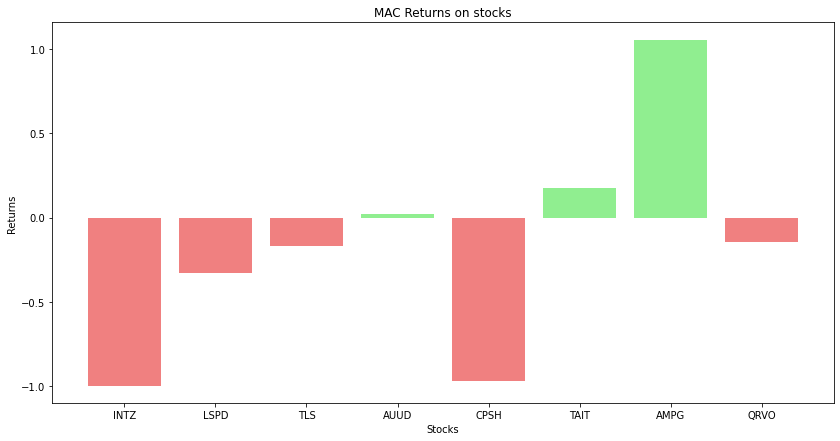

In [28]:
visualize_returns(it, sma, lma, start, end)

In [29]:
test_optimize(it, start, end, sma_range, lma_range)

[*********************100%***********************]  1 of 1 completed
SMA value: 2 and LMA value: 60
SMA value: 2 and LMA value: 65
SMA value: 2 and LMA value: 70
SMA value: 2 and LMA value: 75
SMA value: 4 and LMA value: 60
SMA value: 4 and LMA value: 65
SMA value: 4 and LMA value: 70
SMA value: 4 and LMA value: 75
SMA value: 6 and LMA value: 60
SMA value: 6 and LMA value: 65
SMA value: 6 and LMA value: 70
SMA value: 6 and LMA value: 75
SMA value: 8 and LMA value: 60
SMA value: 8 and LMA value: 65
SMA value: 8 and LMA value: 70
SMA value: 8 and LMA value: 75
SMA value: 10 and LMA value: 60
SMA value: 10 and LMA value: 65
SMA value: 10 and LMA value: 70
SMA value: 10 and LMA value: 75
Cummulative strategy returns for INTZ: 2.634
[*********************100%***********************]  1 of 1 completed
SMA value: 2 and LMA value: 60
SMA value: 2 and LMA value: 65
SMA value: 2 and LMA value: 70


IndexError: ignored

# Business Services

In [30]:
busiserv = ['BRPA', 'LMFA', 'OXBR', 'GHVI', 'BTCM', 'TIG', 'MFH', 'LYL', 'AMRK', 'FDBC']
busiserv_down = ['HFBL', 'BHV', 'RICE', 'ASPS', 'VERY', 'EMCF', 'MN', 'AEL']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for BRPA: -0.892
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for LMFA: -0.966
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for OXBR: -1.182
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for GHVI: -0.064
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for BTCM: -0.077
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for TIG: -0.149
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for MFH: -0.259
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for LYL: -0.963
[*********************100%***********************]  1 of 1 completed
Cummulative St

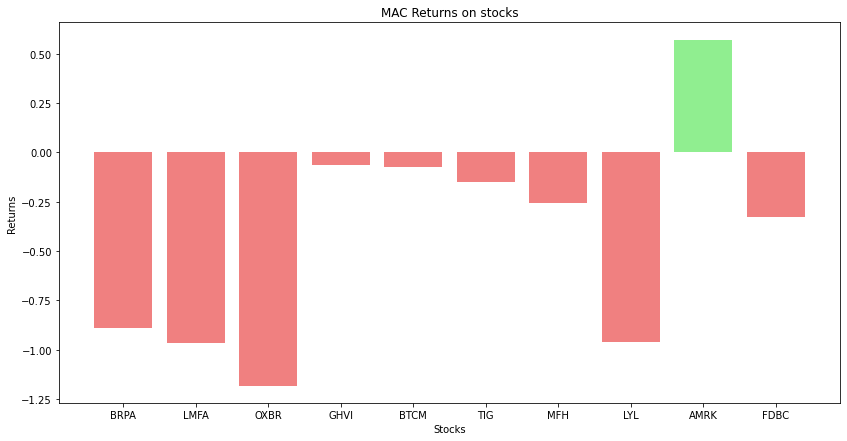

In [31]:
visualize_returns(busiserv, sma, lma, start, end)

In [32]:
cumm_returns(busiserv_down, sma, lma, start, end)

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for HFBL: 0.716
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for BHV: -0.057
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for RICE: -0.551
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for ASPS: -0.955
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for VERY: -0.787
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for EMCF: -0.394
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for MN: -0.97
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for AEL: -0.945
Computations Completed!


In [33]:
test_optimize(busiserv, start, end, sma_range, lma_range)

[*********************100%***********************]  1 of 1 completed
SMA value: 2 and LMA value: 60
SMA value: 2 and LMA value: 65
SMA value: 2 and LMA value: 70
SMA value: 2 and LMA value: 75
SMA value: 4 and LMA value: 60
SMA value: 4 and LMA value: 65
SMA value: 4 and LMA value: 70
SMA value: 4 and LMA value: 75
SMA value: 6 and LMA value: 60
SMA value: 6 and LMA value: 65
SMA value: 6 and LMA value: 70
SMA value: 6 and LMA value: 75
SMA value: 8 and LMA value: 60
SMA value: 8 and LMA value: 65


IndexError: ignored

# Fast Moving Consumer Goods (FMCG)

In [34]:
fmcg = ['PLIN', 'REDU', 'HIMS', 'HRL', 'UG', 'AMBO', 'FEDU', 'CELH', 'PETZ', 'CLEU']
fmcg_down = ['COE', 'LXEH', 'PME', 'REED', 'BJ', 'METX', 'ONE', 'RLX']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for PLIN: -0.26
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for REDU: -0.662
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for HIMS: -0.21
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for HRL: -0.625
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for UG: -0.686
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for AMBO: -1.014
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for FEDU: -0.128
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for CELH: -0.728
[*********************100%***********************]  1 of 1 completed
Cummulative Stra

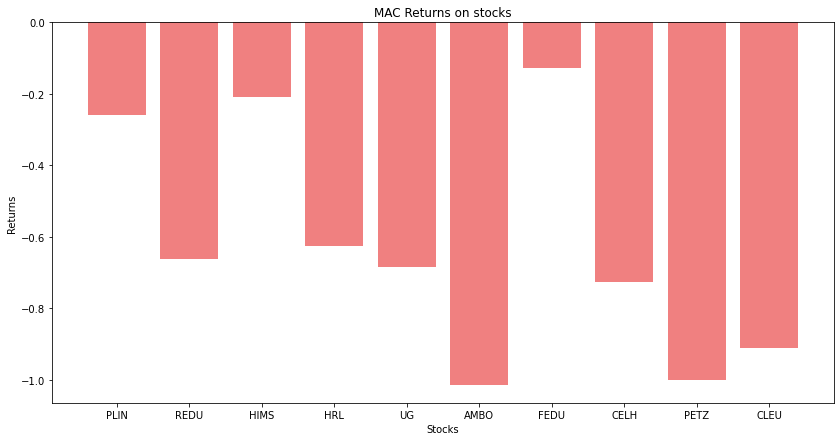

In [35]:
visualize_returns(fmcg, sma, lma, start, end)

In [36]:
cumm_returns(fmcg_down, sma, lma, start, end)

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for COE: -0.899
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for LXEH: -0.36
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for PME: -0.845
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for REED: 1.035
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for BJ: -0.47
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for METX: 0.385
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for ONE: -0.267
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for RLX: -0.263
Computations Completed!


In [37]:
test_optimize(fmcg, start, end, sma_range, lma_range)

[*********************100%***********************]  1 of 1 completed
SMA value: 2 and LMA value: 60
SMA value: 2 and LMA value: 65
SMA value: 2 and LMA value: 70
SMA value: 2 and LMA value: 75
SMA value: 4 and LMA value: 60
SMA value: 4 and LMA value: 65
SMA value: 4 and LMA value: 70


IndexError: ignored

# Consumer Discretionary
AKA cylical consumer stocks

In [38]:
cd = ['BBQ', 'BBIG', 'MRM', 'FORD', 'OCG', 'CATO', 'AUVI', 'RICK', 'POSH', 
      'DIS', 'HLT', 'WMT']
cd_down = ['RIDE', 'FOSL', 'KSS', 'ANF', 'RL', 'URBN', 'JWN', 'LOTZ', 'LCUT']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for BBQ: -0.839
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for BBIG: -1.053
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for MRM: -0.059
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for FORD: -1.117
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for OCG: -1.056
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for CATO: 2.91
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for AUVI: 0.82
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for RICK: -0.626
[*********************100%***********************]  1 of 1 completed
Cummulative Strate

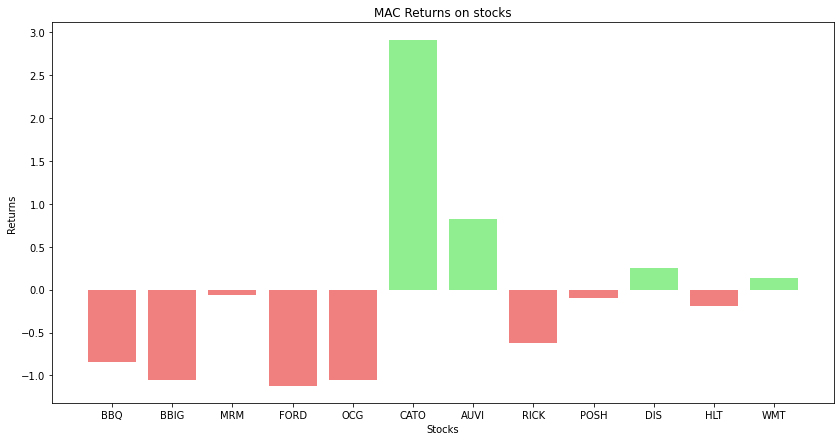

In [39]:
visualize_returns(cd, sma, lma, start, end)

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for RIDE: -0.649
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for FOSL: -0.93
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for KSS: -0.499
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for ANF: 0.078
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for RL: -0.379
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for URBN: 1.167
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for JWN: -0.178
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for LOTZ: 0.27
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy 

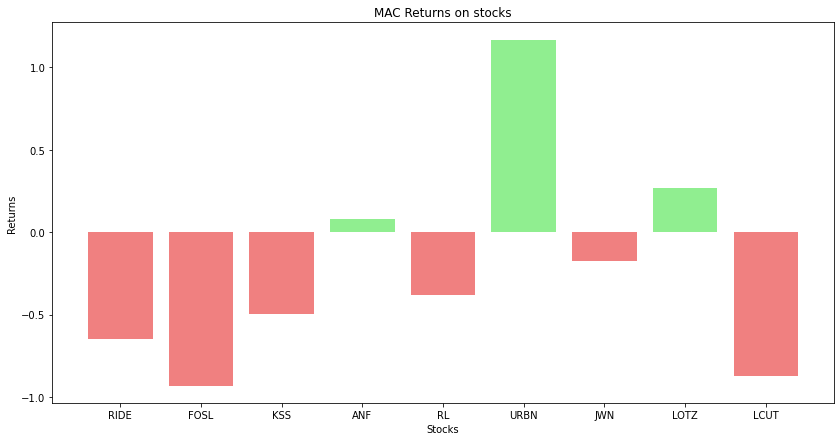

In [40]:
visualize_returns(cd_down, sma, lma, start, end)

In [41]:
test_optimize(cd, start, end, sma_range, lma_range)

[*********************100%***********************]  1 of 1 completed
SMA value: 2 and LMA value: 60
SMA value: 2 and LMA value: 65
SMA value: 2 and LMA value: 70
SMA value: 2 and LMA value: 75
SMA value: 4 and LMA value: 60
SMA value: 4 and LMA value: 65
SMA value: 4 and LMA value: 70
SMA value: 4 and LMA value: 75
SMA value: 6 and LMA value: 60
SMA value: 6 and LMA value: 65
SMA value: 6 and LMA value: 70
SMA value: 6 and LMA value: 75
SMA value: 8 and LMA value: 60
SMA value: 8 and LMA value: 65
SMA value: 8 and LMA value: 70
SMA value: 8 and LMA value: 75
SMA value: 10 and LMA value: 60
SMA value: 10 and LMA value: 65
SMA value: 10 and LMA value: 70
SMA value: 10 and LMA value: 75
Cummulative strategy returns for BBQ: 2.154
[*********************100%***********************]  1 of 1 completed
SMA value: 2 and LMA value: 60
SMA value: 2 and LMA value: 65
SMA value: 2 and LMA value: 70
SMA value: 2 and LMA value: 75
SMA value: 4 and LMA value: 60
SMA value: 4 and LMA value: 65
SMA valu

IndexError: ignored

#Real Estate

In [42]:
real_estate = ['O', 'SPG', 'PSA', 'DLR', 'AMT', 'STAG', 'NTP', 'IHT',
               'AEI', 'CBRE', 'QK', 'HT', 'SKT', 'XHR']

In [ ]:
test_optimize(real_estate, start, end, sma_range, lma_range)

[*********************100%***********************]  1 of 1 completed
SMA value: 2 and LMA value: 60
SMA value: 2 and LMA value: 65
SMA value: 2 and LMA value: 70
SMA value: 2 and LMA value: 75
SMA value: 4 and LMA value: 60
SMA value: 4 and LMA value: 65
SMA value: 4 and LMA value: 70
SMA value: 4 and LMA value: 75
SMA value: 6 and LMA value: 60
SMA value: 6 and LMA value: 65
SMA value: 6 and LMA value: 70
SMA value: 6 and LMA value: 75
SMA value: 8 and LMA value: 60
SMA value: 8 and LMA value: 65
SMA value: 8 and LMA value: 70
SMA value: 8 and LMA value: 75
SMA value: 10 and LMA value: 60
SMA value: 10 and LMA value: 65
SMA value: 10 and LMA value: 70
SMA value: 10 and LMA value: 75
Cummulative strategy returns for O: 0.075
[*********************100%***********************]  1 of 1 completed
SMA value: 2 and LMA value: 60
SMA value: 2 and LMA value: 65
SMA value: 2 and LMA value: 70
SMA value: 2 and LMA value: 75
SMA value: 4 and LMA value: 60
SMA value: 4 and LMA value: 65
SMA value:

IndexError: ignored

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for O: -0.32
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for SPG: -0.474
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for PSA: -0.218
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for DLR: -0.342
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for AMT: -0.442
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for STAG: 0.478
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for NTP: 2.814
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for IHT: -0.994
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Re

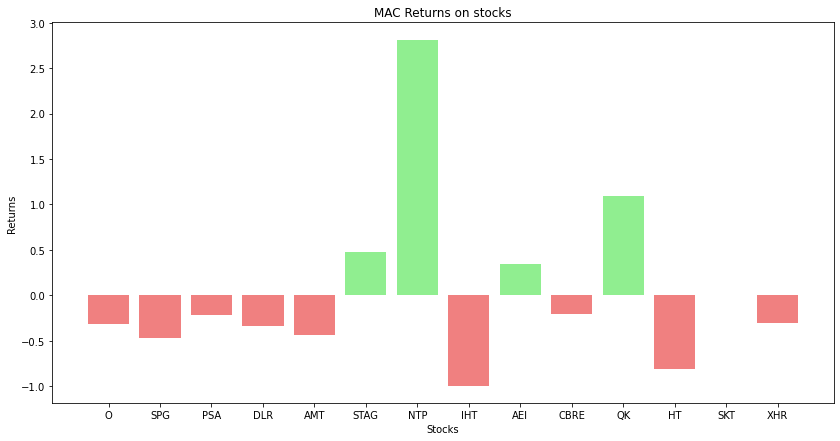

In [ ]:
visualize_returns(real_estate, sma, lma, start, end)

#Materials

In [45]:
materials=['VALE', 'HUN', 'SCCO', 'FCX', 'ECL', 'APD', 'DD', 'XLB', 'CE', 'NEU', 'SCCO',
           'NUE', 'RPM', 'CC', 'OLN', 'XLB', 'RIO', 'LYB', 'IP', ]

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for VALE: -0.209
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for HUN: 0.928
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for SCCO: 1.859
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for FCX: 1.056
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for ECL: -0.624
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for APD: -0.371
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for DD: -0.413
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for XLB: 0.207
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy R

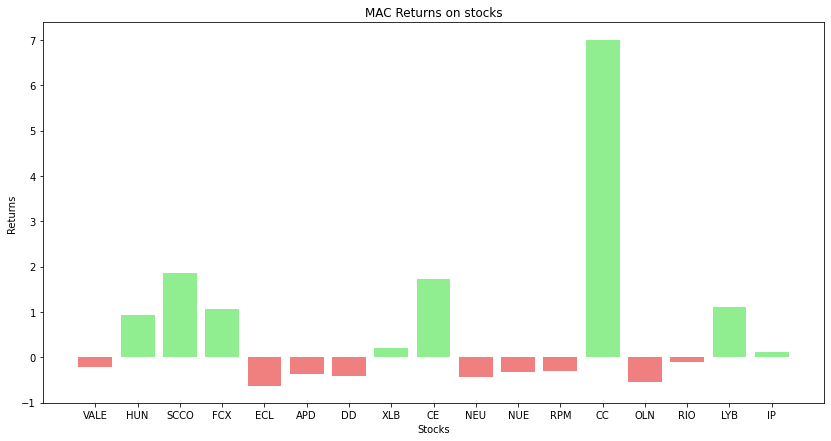

In [46]:
visualize_returns(materials, sma, lma, start, end)

In [47]:
test_optimize(materials, start, end, sma_range, lma_range)

[*********************100%***********************]  1 of 1 completed
SMA value: 2 and LMA value: 60
SMA value: 2 and LMA value: 65
SMA value: 2 and LMA value: 70
SMA value: 2 and LMA value: 75
SMA value: 4 and LMA value: 60
SMA value: 4 and LMA value: 65
SMA value: 4 and LMA value: 70
SMA value: 4 and LMA value: 75
SMA value: 6 and LMA value: 60
SMA value: 6 and LMA value: 65
SMA value: 6 and LMA value: 70
SMA value: 6 and LMA value: 75
SMA value: 8 and LMA value: 60
SMA value: 8 and LMA value: 65
SMA value: 8 and LMA value: 70
SMA value: 8 and LMA value: 75
SMA value: 10 and LMA value: 60
SMA value: 10 and LMA value: 65
SMA value: 10 and LMA value: 70
SMA value: 10 and LMA value: 75
Cummulative strategy returns for VALE: 0.858
[*********************100%***********************]  1 of 1 completed
SMA value: 2 and LMA value: 60
SMA value: 2 and LMA value: 65
SMA value: 2 and LMA value: 70
SMA value: 2 and LMA value: 75
SMA value: 4 and LMA value: 60
SMA value: 4 and LMA value: 65
SMA val

#Utilities/ Energy
* Duke Electric

In [ ]:
util = ['NEE', 'CVX', 'DUK', 'D', 'XEL', 'XLU', 'SRE', 'VST', 'UGI', 'WTRG', 'EIX', 'AEP', 
        'AES', 'CNP', 'DTE', 'ETR', 'IDA', 'NFG', 'NI', 'NRG', 'NOVA', 'AWK', 'BIP', 'NEE']

In [ ]:
visualize_returns(util, sma, lma, start, end)

In [ ]:
test_optimize(util, start, end, sma_range, lma_range)